# Quote Analysis using Web Scraping and Data Analysis

**Course:** Programming for Data Science  
**Institution:** Institute of Technology of Cambodia  
**Group:** Group 9  
**Academic Year:** 2025–2026  

---

This notebook presents a complete data analysis workflow, including web scraping, data cleaning, feature engineering, and exploratory data analysis (EDA) using a quote dataset collected from a public website.


## 1. Introduction

Quotes are widely used to express ideas, inspiration, and wisdom across different themes such as life, love, and knowledge. With the increasing availability of online textual data, analyzing quotes provides an opportunity to explore patterns in authorship, text structure, and thematic categorization.

This notebook demonstrates the use of Python for collecting and analyzing real-world textual data through web scraping and exploratory data analysis techniques.


## 2. Objectives

The objectives of this project are:
- To collect quote data from a publicly available website using web scraping
- To clean and preprocess the scraped data
- To engineer useful features such as quote length and tag count
- To perform exploratory data analysis to identify patterns related to authors and themes


## 3. Data Collection (Web Scraping)

Data is collected from the website **http://quotes.toscrape.com** using the `requests` and `BeautifulSoup` libraries.  
The website contains multiple pages of quotes, which are accessed using pagination by detecting the “Next” button.

To ensure ethical scraping, only publicly available data is collected and a delay is added between requests.


In [852]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

BASE_URL = "http://quotes.toscrape.com"
HEADERS = {"User-Agent": "Mozilla/5.0"}

quotes_data = []
page = 1

while True:
    url = f"{BASE_URL}/page/{page}/"
    print(f"Scraping page {page}: {url}")

    response = requests.get(url, headers=HEADERS, timeout=10)
    response.raise_for_status()

    soup = BeautifulSoup(response.text, "html.parser")
    quote_blocks = soup.find_all("div", class_="quote")

    for quote in quote_blocks:
        text_tag = quote.find("span", class_="text")
        author_tag = quote.find("small", class_="author")
        tag_tags = quote.find_all("a", class_="tag")

        text = text_tag.get_text(strip=True) if text_tag else ""
        author = author_tag.get_text(strip=True) if author_tag else ""
        tag_list = [t.get_text(strip=True) for t in tag_tags]

        # Store extracted data as a dictionary
        quotes_data.append({
            "quote": text,
            "author": author,
            "tags": ", ".join(tag_list)
        })

    next_button = soup.find("li", class_="next")
    if not next_button:
        break

    page += 1
    time.sleep(1)

df = pd.DataFrame(quotes_data)
df.to_csv("quotes_raw.csv", index=False)

print("Scraping completed!")
print("Total quotes scraped:", len(df))


Scraping page 1: http://quotes.toscrape.com/page/1/
Scraping page 2: http://quotes.toscrape.com/page/2/
Scraping page 3: http://quotes.toscrape.com/page/3/
Scraping page 4: http://quotes.toscrape.com/page/4/
Scraping page 5: http://quotes.toscrape.com/page/5/
Scraping page 6: http://quotes.toscrape.com/page/6/
Scraping page 7: http://quotes.toscrape.com/page/7/
Scraping page 8: http://quotes.toscrape.com/page/8/
Scraping page 9: http://quotes.toscrape.com/page/9/
Scraping page 10: http://quotes.toscrape.com/page/10/
Scraping completed!
Total quotes scraped: 100


## 4. Raw Data Overview

The raw dataset contains quote text, author names, and associated tags.  
Before analysis, the structure and quality of the dataset are examined.


In [853]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("quotes_raw.csv")

In [854]:
df.head(5)

,quote,author,tags
0,“The world as we have created it is a process ...,Albert Einstein,"change, deep-thoughts, thinking, world"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities, choices"
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational, life, live, miracle, miracles"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy, books, classic, humor"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself, inspirational"


In [855]:
df.tail(5)

,quote,author,tags
95,“You never really understand a person until yo...,Harper Lee,better-life-empathy
96,“You have to write the book that wants to be w...,Madeleine L'Engle,"books, children, difficult, grown-ups, write, ..."
97,“Never tell the truth to people who are not wo...,Mark Twain,truth
98,"“A person's a person, no matter how small.”",Dr. Seuss,inspirational
99,“... a mind needs books as a sword needs a whe...,George R.R. Martin,"books, mind"


In [856]:
df.shape

(100, 3)

In [857]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quote   100 non-null    object
 1   author  100 non-null    object
 2   tags    97 non-null     object
dtypes: object(3)
memory usage: 2.5+ KB


## 5. Data Cleaning

The dataset is cleaned to ensure consistency and usability for analysis.  
This includes removing unnecessary characters, standardizing text fields, and handling missing values.


In [858]:
df.isna().sum()

quote     0
author    0
tags      3
dtype: int64

In [859]:
df = df.copy()
df.dropna(inplace=True)
df.shape

(97, 3)

In [860]:
df.isna().sum()

quote     0
author    0
tags      0
dtype: int64

In [861]:
df.duplicated().sum()

np.int64(0)

## 6. Feature Engineering

Additional features are created to enable deeper analysis:
- **Quote Length:** number of characters in each quote
- **Tag Count:** number of tags associated with each quote


In [862]:
df["length"] = df["quote"].str.len()
df["tag_count"] = df["tags"].apply(lambda x: len([t for t in x.split(',') if t.strip()]) if x else 0)

In [863]:
df.head(5)

,quote,author,tags,length,tag_count
0,“The world as we have created it is a process ...,Albert Einstein,"change, deep-thoughts, thinking, world",115,4
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities, choices",85,2
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational, life, live, miracle, miracles",131,5
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy, books, classic, humor",104,4
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself, inspirational",111,2


## 7. Descriptive Statistics

Basic statistics are used to summarize key characteristics of the dataset.


In [864]:
Q1 = df['length'].quantile(0.25)
Q3 = df['length'].quantile(0.75)
IQR = Q3 - Q1

lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR

print(f"IQR Method:")
print(f"  Q1 (25th percentile): {Q1:.2f}")
print(f"  Q3 (75th percentile): {Q3:.2f}")
print(f"  IQR: {IQR:.2f}")
print(f"  Lower bound: {lower_bound_iqr:.2f}")
print(f"  Upper bound: {upper_bound_iqr:.2f}")

iqr_outliers = df[(df['length'] < lower_bound_iqr) | (df['length'] > upper_bound_iqr)]
print(f"  Number of IQR outliers: {len(iqr_outliers)}")
print(f"  Percentage of IQR outliers: {(len(iqr_outliers)/len(df))*100:.2f}%")

IQR Method:
  Q1 (25th percentile): 65.00
  Q3 (75th percentile): 125.00
  IQR: 60.00
  Lower bound: -25.00
  Upper bound: 215.00
  Number of IQR outliers: 10
  Percentage of IQR outliers: 10.31%


In [865]:
df.describe()

,length,tag_count
count,97.000000,97.000000
mean,122.804124,2.391753
std,135.549779,1.655525
min,34.000000,1.000000
25%,65.000000,1.000000
50%,87.000000,2.000000
75%,125.000000,3.000000
max,1084.000000,8.000000


## 8. EDA & VISUALIZATION

**1. Distribution of Quote Length**

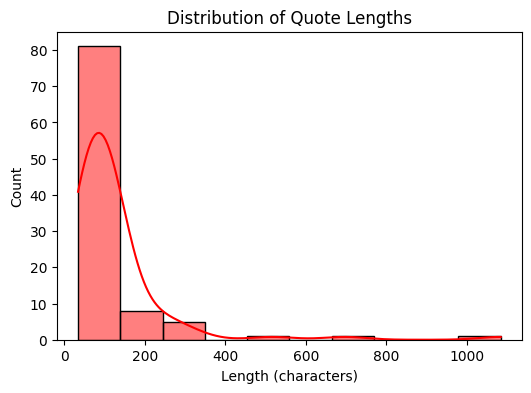

In [866]:
plt.figure(figsize=(6,4))
sns.histplot(df["length"], bins=10,color='red', kde=True)
plt.title("Distribution of Quote Lengths")
plt.xlabel("Length (characters)")
plt.ylabel("Count")
plt.show()


This plot shows how quote lengths are distributed, helping to understand whether most quotes are short or long.


**2. Distribution of Tag Count**

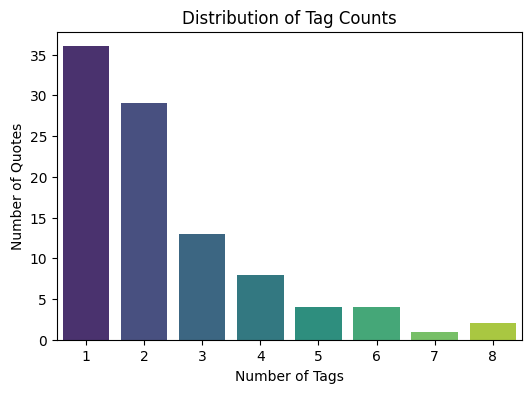

In [867]:
plt.figure(figsize=(6,4))
sns.countplot(x="tag_count", data=df,palette='viridis')
plt.title("Distribution of Tag Counts")
plt.xlabel("Number of Tags")
plt.ylabel("Number of Quotes")
plt.show()

This visualization shows how many tags are typically assigned to each quote.


**3. Authors with the Most Quotes**

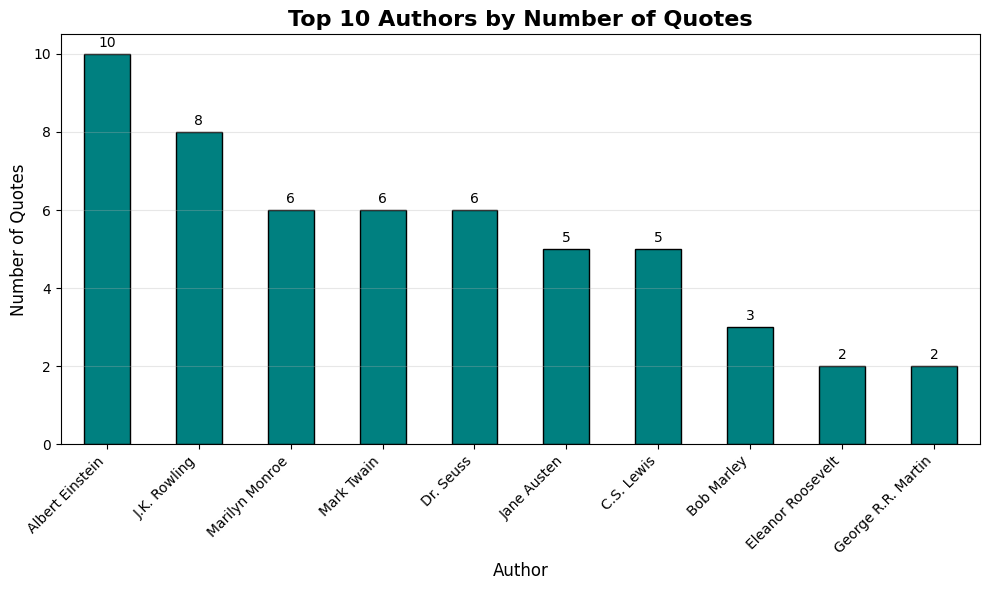

In [868]:
top_authors_count = df["author"].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_authors_count.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Top 10 Authors by Number of Quotes', fontsize=16, fontweight='bold')
plt.xlabel('Author', fontsize=12)
plt.ylabel('Number of Quotes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(top_authors_count.values):
    plt.text(i, v + max(top_authors_count.values)*0.01, str(v), 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

This plot highlights authors who appear most frequently in the dataset.


**4. Authors with Longest Average Quote Length**

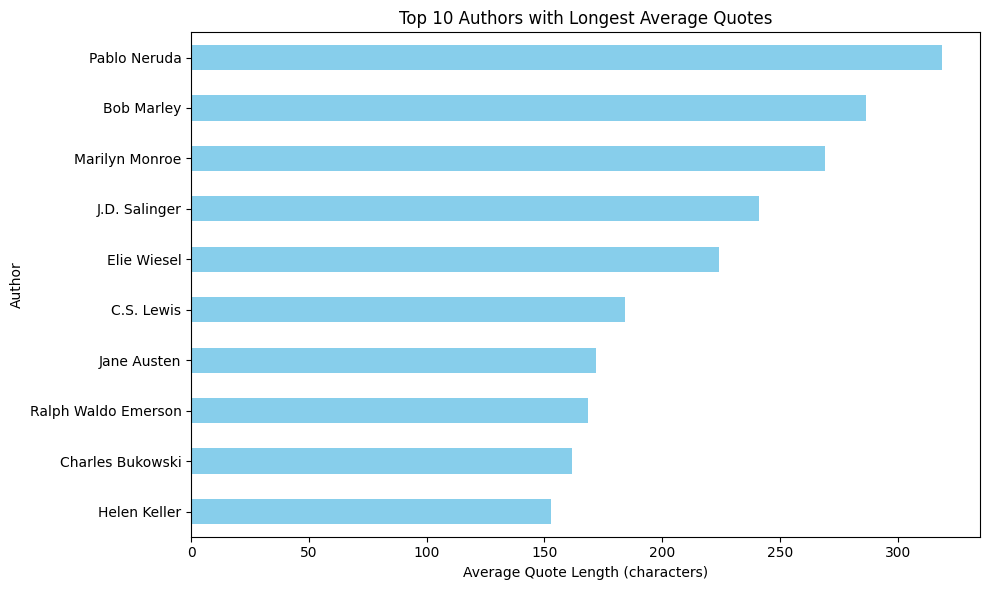

In [869]:
top_authors = df.groupby('author')['length'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_authors.plot(kind='barh', color='skyblue')
plt.title('Top 10 Authors with Longest Average Quotes')
plt.xlabel('Average Quote Length (characters)')
plt.ylabel('Author')
plt.gca().invert_yaxis()  # Show longest at top
plt.tight_layout()
plt.show()

This visualization compares authors based on the average length of their quotes.


**5. Most Common Tags**

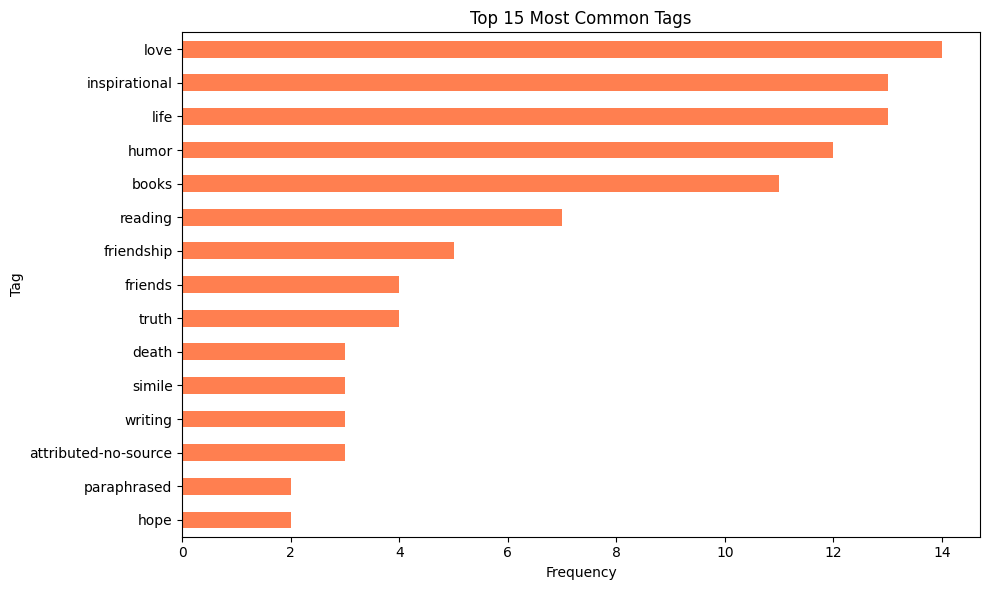

In [870]:
all_tags = []
for tags in df['tags'].dropna():
    tag_list = [tag.strip() for tag in str(tags).split(',') if tag.strip()]
    all_tags.extend(tag_list)

tag_counts = pd.Series(all_tags).value_counts().head(15)

plt.figure(figsize=(10, 6))
tag_counts.plot(kind='barh', color='coral')
plt.title('Top 15 Most Common Tags')
plt.xlabel('Frequency')
plt.ylabel('Tag')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

This plot identifies the most frequently used tags, indicating common themes in the dataset.


**6. Cumulative Distribution of Quote Length**

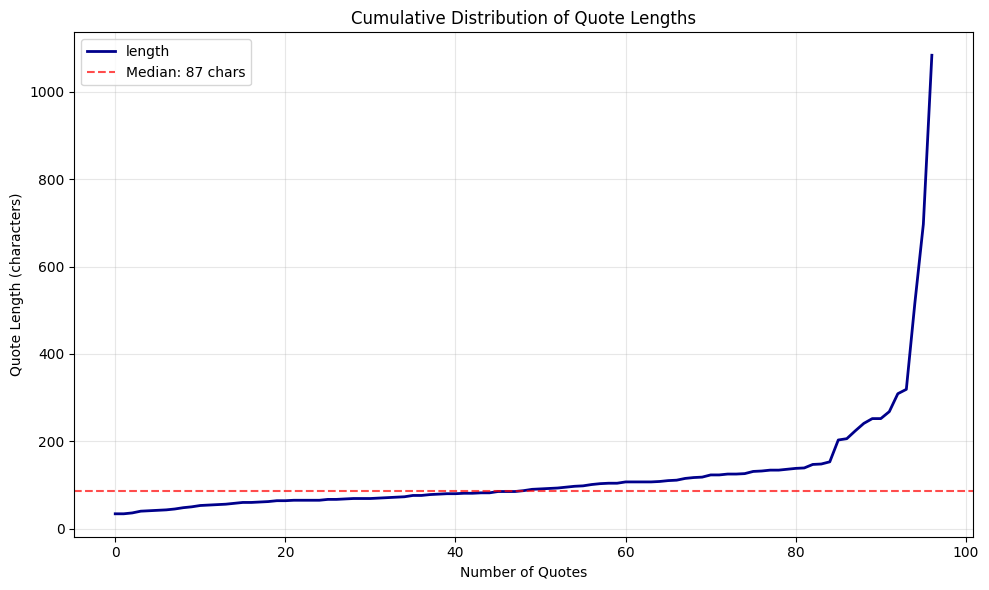

In [871]:
plt.figure(figsize=(10, 6))
df['length'].sort_values().reset_index(drop=True).plot(
    kind='line', 
    title='Cumulative Distribution of Quote Lengths',
    xlabel='Number of Quotes',
    ylabel='Quote Length (characters)',
    color='darkblue',
    linewidth=2
)
plt.grid(True, alpha=0.3)
plt.axhline(y=df['length'].median(), color='red', linestyle='--', 
            alpha=0.7, label=f'Median: {df["length"].median():.0f} chars')
plt.legend()
plt.tight_layout()
plt.show()

This plot shows how quote lengths increase when sorted from shortest to longest, helping identify outliers.


**7. Correlation Heatmap**

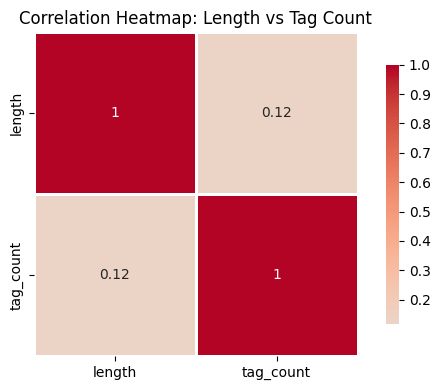

In [872]:
correlation = df[['length', 'tag_count']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap: Length vs Tag Count')
plt.tight_layout()
plt.show()

This heatmap shows the relationship between quote length and the number of tags assigned to a quote.


## 9. Conclusion

This notebook demonstrated the complete data analysis pipeline, from web scraping to exploratory analysis. The results reveal patterns in quote length, authorship, and thematic tagging, highlighting the importance of feature engineering in textual data analysis.


## Limitations

- The dataset is limited to a single website, which may reduce generalizability.
- The number of quotes is relatively small.
- Tags are manually assigned and may be subjective.


## Future Work

- Collect data from multiple quote websites to increase dataset size.
- Apply natural language processing techniques such as sentiment analysis.
- Use machine learning to classify quotes by theme or writing style.
